In [1]:

library(readr)
library(ggplot2)
library(tidyr)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:


rd <- readr::read_csv("https://github.com/WayScience/CPBS7601/raw/refs/heads/main/materials/04.data_wrangling/results/ttest_results_tidyverse.csv")

pd<- readr::read_csv("https://github.com/WayScience/CPBS7601/raw/refs/heads/main/materials/04.data_wrangling/results/ttest_results_pandas.csv")


                      

Rows: 1415 Columns: 3
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): moa
dbl (2): test_statistic.t, p_value

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1415 Columns: 3
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): moa
dbl (2): test_statistic, p_value

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:

head(rd)
head(pd)


moa,test_statistic.t,p_value
<chr>,<dbl>,<dbl>
HDAC INHIBITOR,7.113728,1.636907e-12
MTOR INHIBITOR,4.773731,2.090123e-06
"DNA PROTEIN KINASE INHIBITOR, MTOR INHIBITOR",4.518397,9.821550e-05
MDM INHIBITOR,3.906045,1.136579e-04
TUBULIN POLYMERIZATION INHIBITOR,3.730575,2.006247e-04
ADENOSINE RECEPTOR ANTAGONIST,3.586917,3.482277e-04


moa,test_statistic,p_value
<chr>,<dbl>,<dbl>
HDAC INHIBITOR,7.113728,1.636907e-12
MTOR INHIBITOR,4.773731,2.090123e-06
"DNA PROTEIN KINASE INHIBITOR, MTOR INHIBITOR",4.518397,9.821550e-05
MDM INHIBITOR,3.906045,1.136579e-04
TUBULIN POLYMERIZATION INHIBITOR,3.730575,2.006247e-04
ADENOSINE RECEPTOR ANTAGONIST,3.586917,3.482277e-04


In [4]:

# combine dataframes 
both= left_join(
    pd %>%
        rename_with(.cols = c(test_statistic, p_value),   .fn = function(x) paste0("p_",x)), 
     rd %>%
        rename_with(.cols = c(test_statistic.t, p_value),   .fn = function(x) paste0("r_",x))
        ) 
head(both)

Joining with `by = join_by(moa)`


moa,p_test_statistic,p_p_value,r_test_statistic.t,r_p_value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
HDAC INHIBITOR,7.113728,1.636907e-12,7.113728,1.636907e-12
MTOR INHIBITOR,4.773731,2.090123e-06,4.773731,2.090123e-06
"DNA PROTEIN KINASE INHIBITOR, MTOR INHIBITOR",4.518397,9.821550e-05,4.518397,9.821550e-05
MDM INHIBITOR,3.906045,1.136579e-04,3.906045,1.136579e-04
TUBULIN POLYMERIZATION INHIBITOR,3.730575,2.006247e-04,3.730575,2.006247e-04
ADENOSINE RECEPTOR ANTAGONIST,3.586917,3.482277e-04,3.586917,3.482277e-04


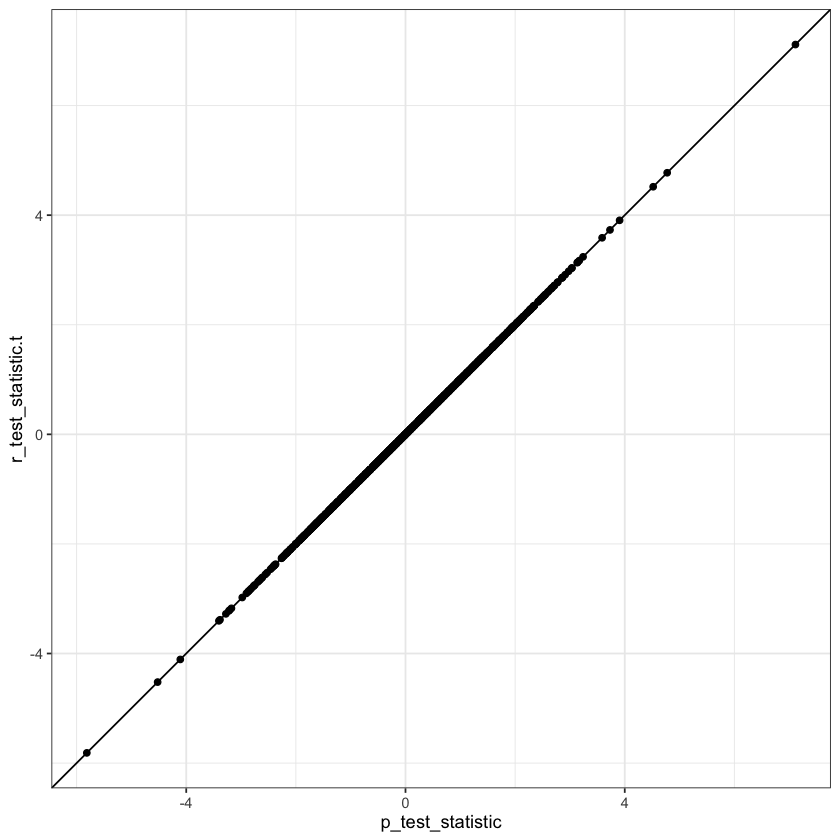

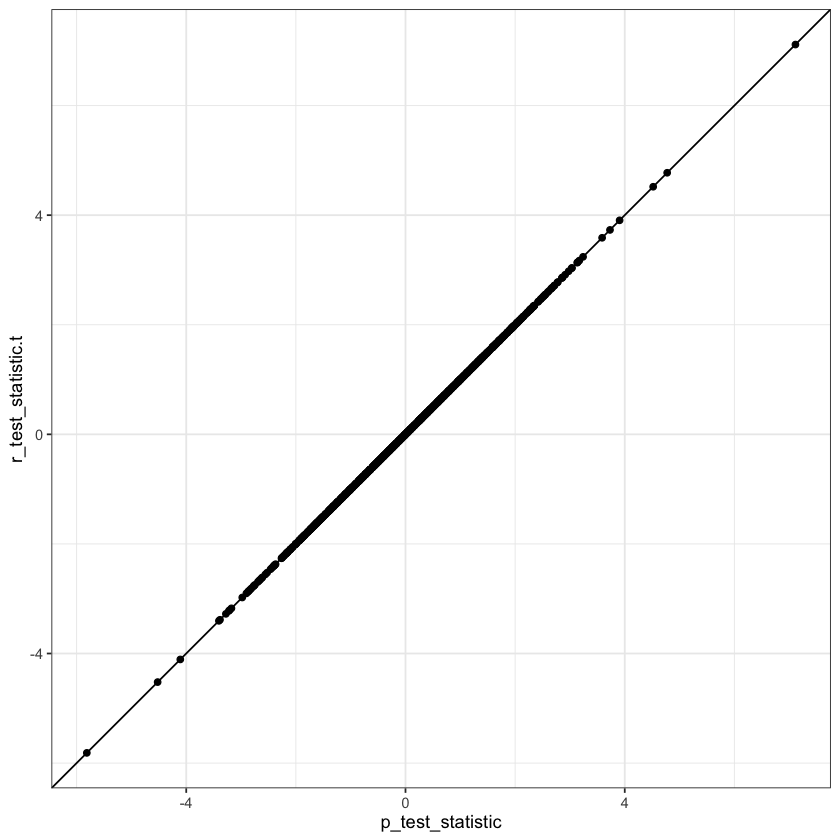

In [5]:

# compare ps and ts between r and python
ps_p=both %>%
    ggplot(aes(p_p_value, r_p_value))+
    geom_point()+
    geom_abline(slope = 1, intercept = 0)+
    theme_bw()

ts_p=ps_p=both %>%
    ggplot(aes(p_test_statistic, r_test_statistic.t))+
    geom_point()+
    geom_abline(slope = 1, intercept = 0)+
    theme_bw()

ps_p
ts_p


In [6]:

# calculate RMSE
sqrt(sum((both$p_p_value-both$r_p_value)^2))
sqrt(sum((both$p_test_statistic-both$r_test_statistic.t)^2))



[1] 2.164036e-14

[1] 7.738438e-14

In [7]:

# are both significant together?
both[(both$p_p_value>0.05 & both$r_p_value<0.05 | both$p_p_value<0.05) & both$r_p_value>0.05, ]



moa,p_test_statistic,p_p_value,r_test_statistic.t,r_p_value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
